In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/74/3q7zx5894sn3t1vdw8tx_mwc0000gn/T/ipykernel_31451/2849325190.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='range', y='total_attendance', data=attendances, palette=custom_palette)


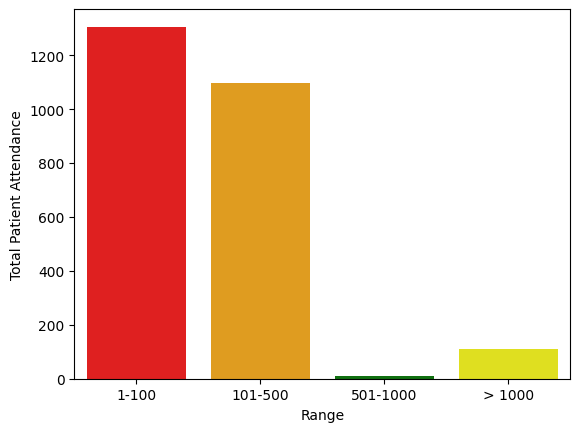

In [2]:
"""## Patient Attendance Data"""

file_path = '/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 2/JK-Allopathic-Outpatient_attendance-May-2019.csv'
data = pd.read_csv(file_path)

"""## Question-1"""

attendances_dict = {
    "range": ["1-100", "101-500", "501-1000", "> 1000"],
    "total_attendance": [data["No. of facilities by performance - 1 to 100"].sum(),
                         data["No. of facilities by performance - 101 to 500"].sum(),
                         data["No. of facilities by performance - 501 to 1000"].sum(),
                         data["No. of facilities by performance - >1000"].sum()]
}

attendances = pd.DataFrame(attendances_dict)

custom_palette = ["red", "orange", "green", "yellow"]

ax = sns.barplot(x='range', y='total_attendance', data=attendances, palette=custom_palette)
ax.set_ylabel('Total Patient Attendance')
ax.set_xlabel('Range')
plt.show()


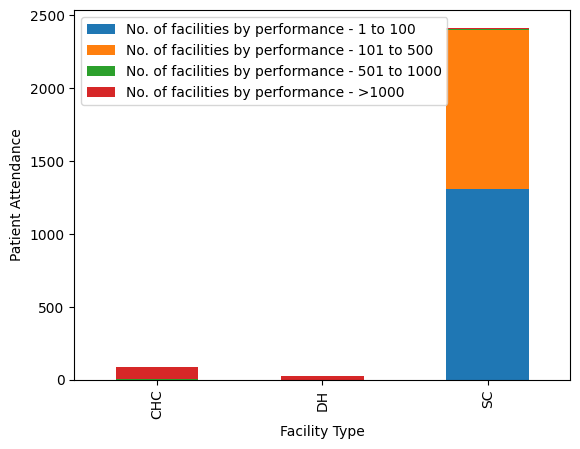

In [3]:
"""## Question-2"""

facilities_Df = data.groupby("Facility Type")[["No. of facilities by performance - 1 to 100",
                                                  "No. of facilities by performance - 101 to 500",
                                                  "No. of facilities by performance - 501 to 1000",
                                                  "No. of facilities by performance - >1000"]].sum()
ax = facilities_Df.plot(kind='bar', stacked=True)
ax.set_xlabel('Facility Type')
ax.set_ylabel('Patient Attendance')
ax.legend(loc='upper left')
plt.show()


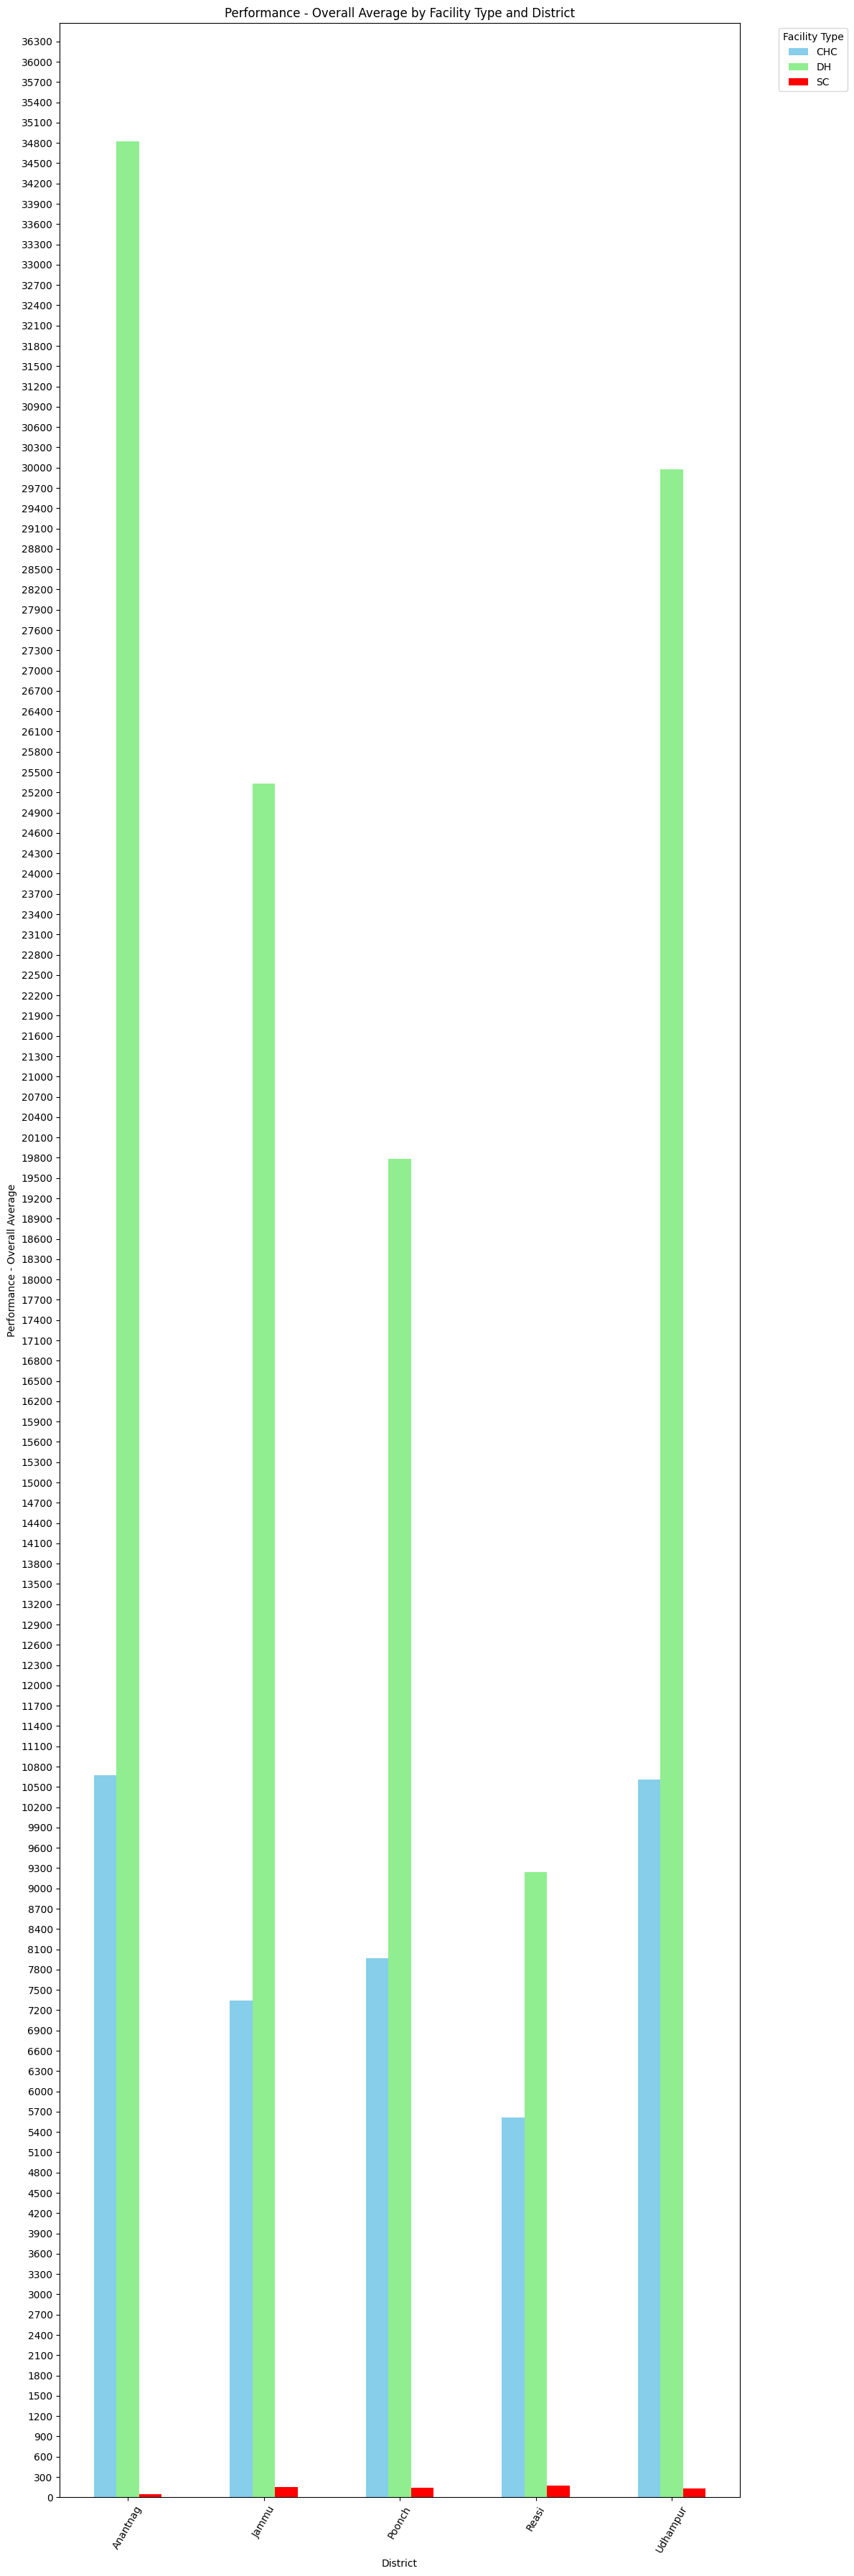

In [4]:
"""## Question-3"""

selected_districts = ['Anantnag', 'Jammu', 'Poonch', 'Reasi', 'Udhampur']
selected_facility_types = ['DH', 'CHC', 'SC']

filtered_data = data[data['District'].isin(selected_districts) & data['Facility Type'].isin(selected_facility_types)]

pivot_data = filtered_data.pivot_table(index='District', columns='Facility Type', values='Performance - Overall Average **', aggfunc='mean')

colors = ['skyblue', 'lightgreen', 'red']
group = pivot_data.plot(kind='bar', color=colors, figsize=(12, 36))

group.set_title('Performance - Overall Average by Facility Type and District')
group.set_xlabel('District')
group.set_ylabel('Performance - Overall Average')
group.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')

max_y_value = group.get_ylim()[1]

plt.yticks(range(0, int(max_y_value) + 1, 300))
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

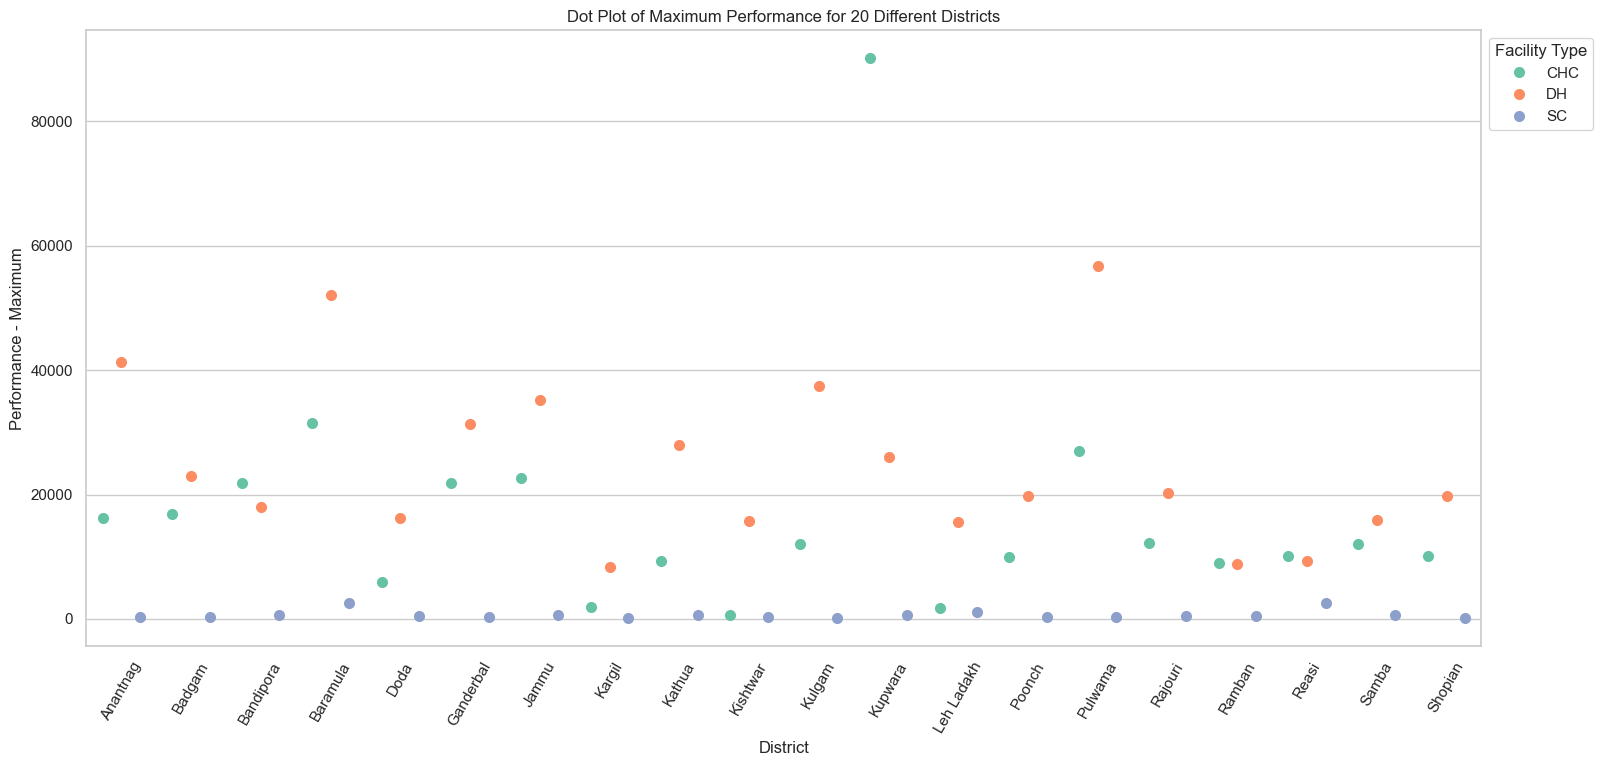

In [5]:
"""## Question-4"""

selected_districts = data['District'].unique()[:20]

selected_data = data[data['District'].isin(selected_districts)]

agg_data = selected_data.groupby(['District', 'Facility Type'])['Performance - Maximum'].max().reset_index()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

sns.stripplot(x='District', y='Performance - Maximum', hue='Facility Type', data=agg_data,
              size=8, jitter=True, dodge=True, marker='o', palette='Set2')

plt.title('Dot Plot of Maximum Performance for 20 Different Districts')
plt.xlabel('District')
plt.ylabel('Performance - Maximum')

plt.legend(title='Facility Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=60)
plt.show()

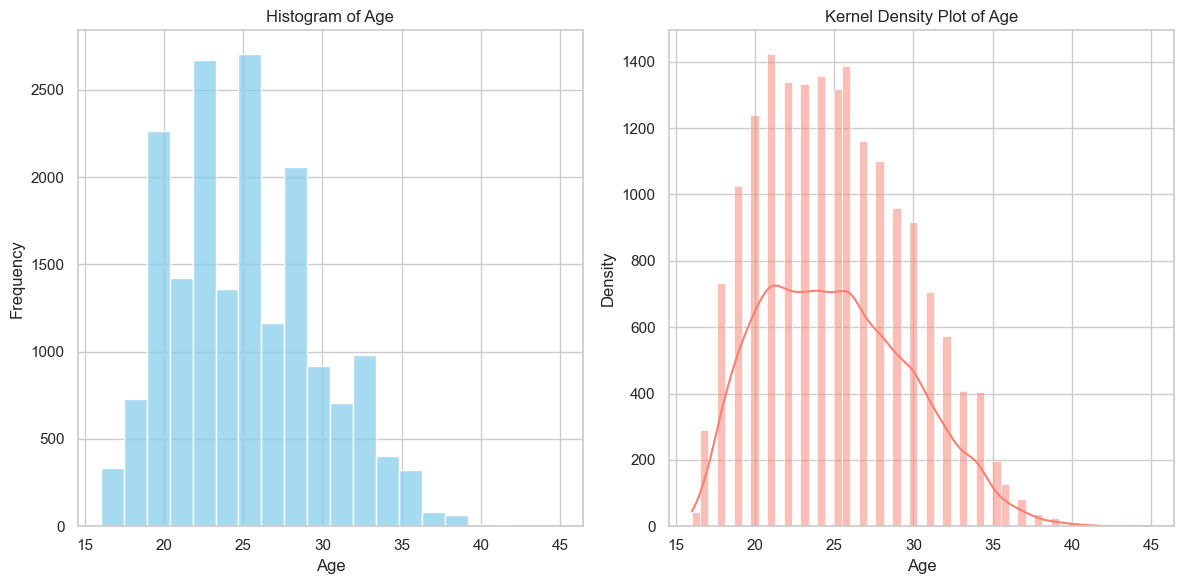

In [7]:

"""## FiFa player Data"""

file_path = '/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 2/Fifa_player_football_data.csv'
df = pd.read_csv(file_path)


"""## Question-1"""

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True, color='salmon')
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()

plt.show()


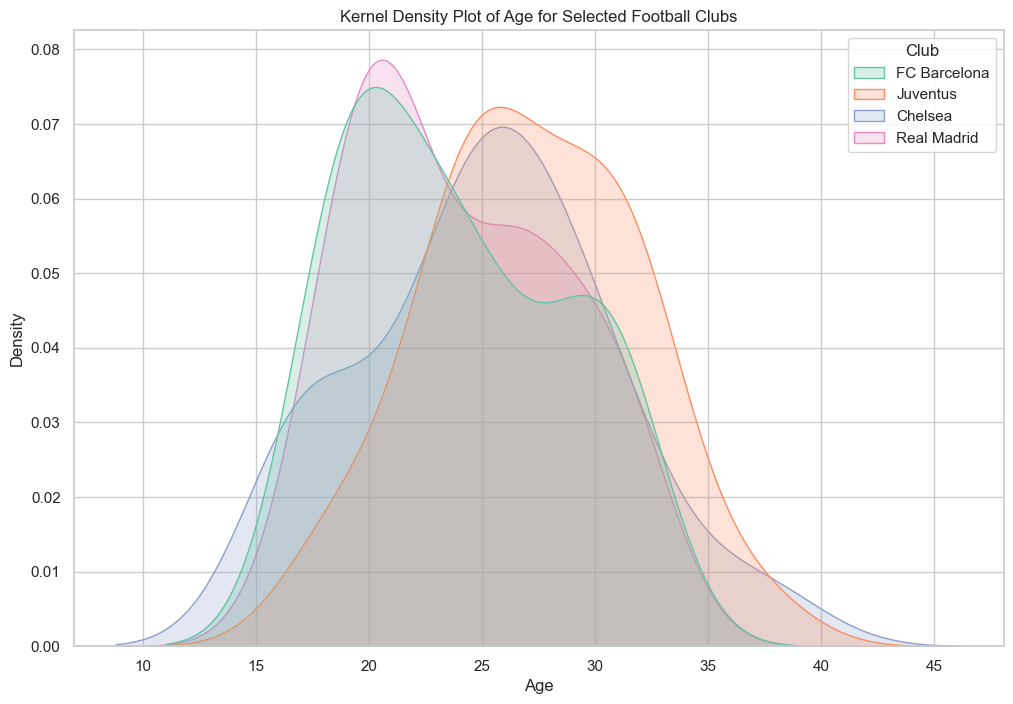

In [8]:
"""## Question-2"""

selected_clubs = ['FC Barcelona', 'Chelsea', 'Juventus', 'Real Madrid']
selected_data = df[df['Club'].isin(selected_clubs)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.kdeplot(data=selected_data, x='Age', hue='Club', fill=True, common_norm=False, palette='Set2')

plt.title('Kernel Density Plot of Age for Selected Football Clubs')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

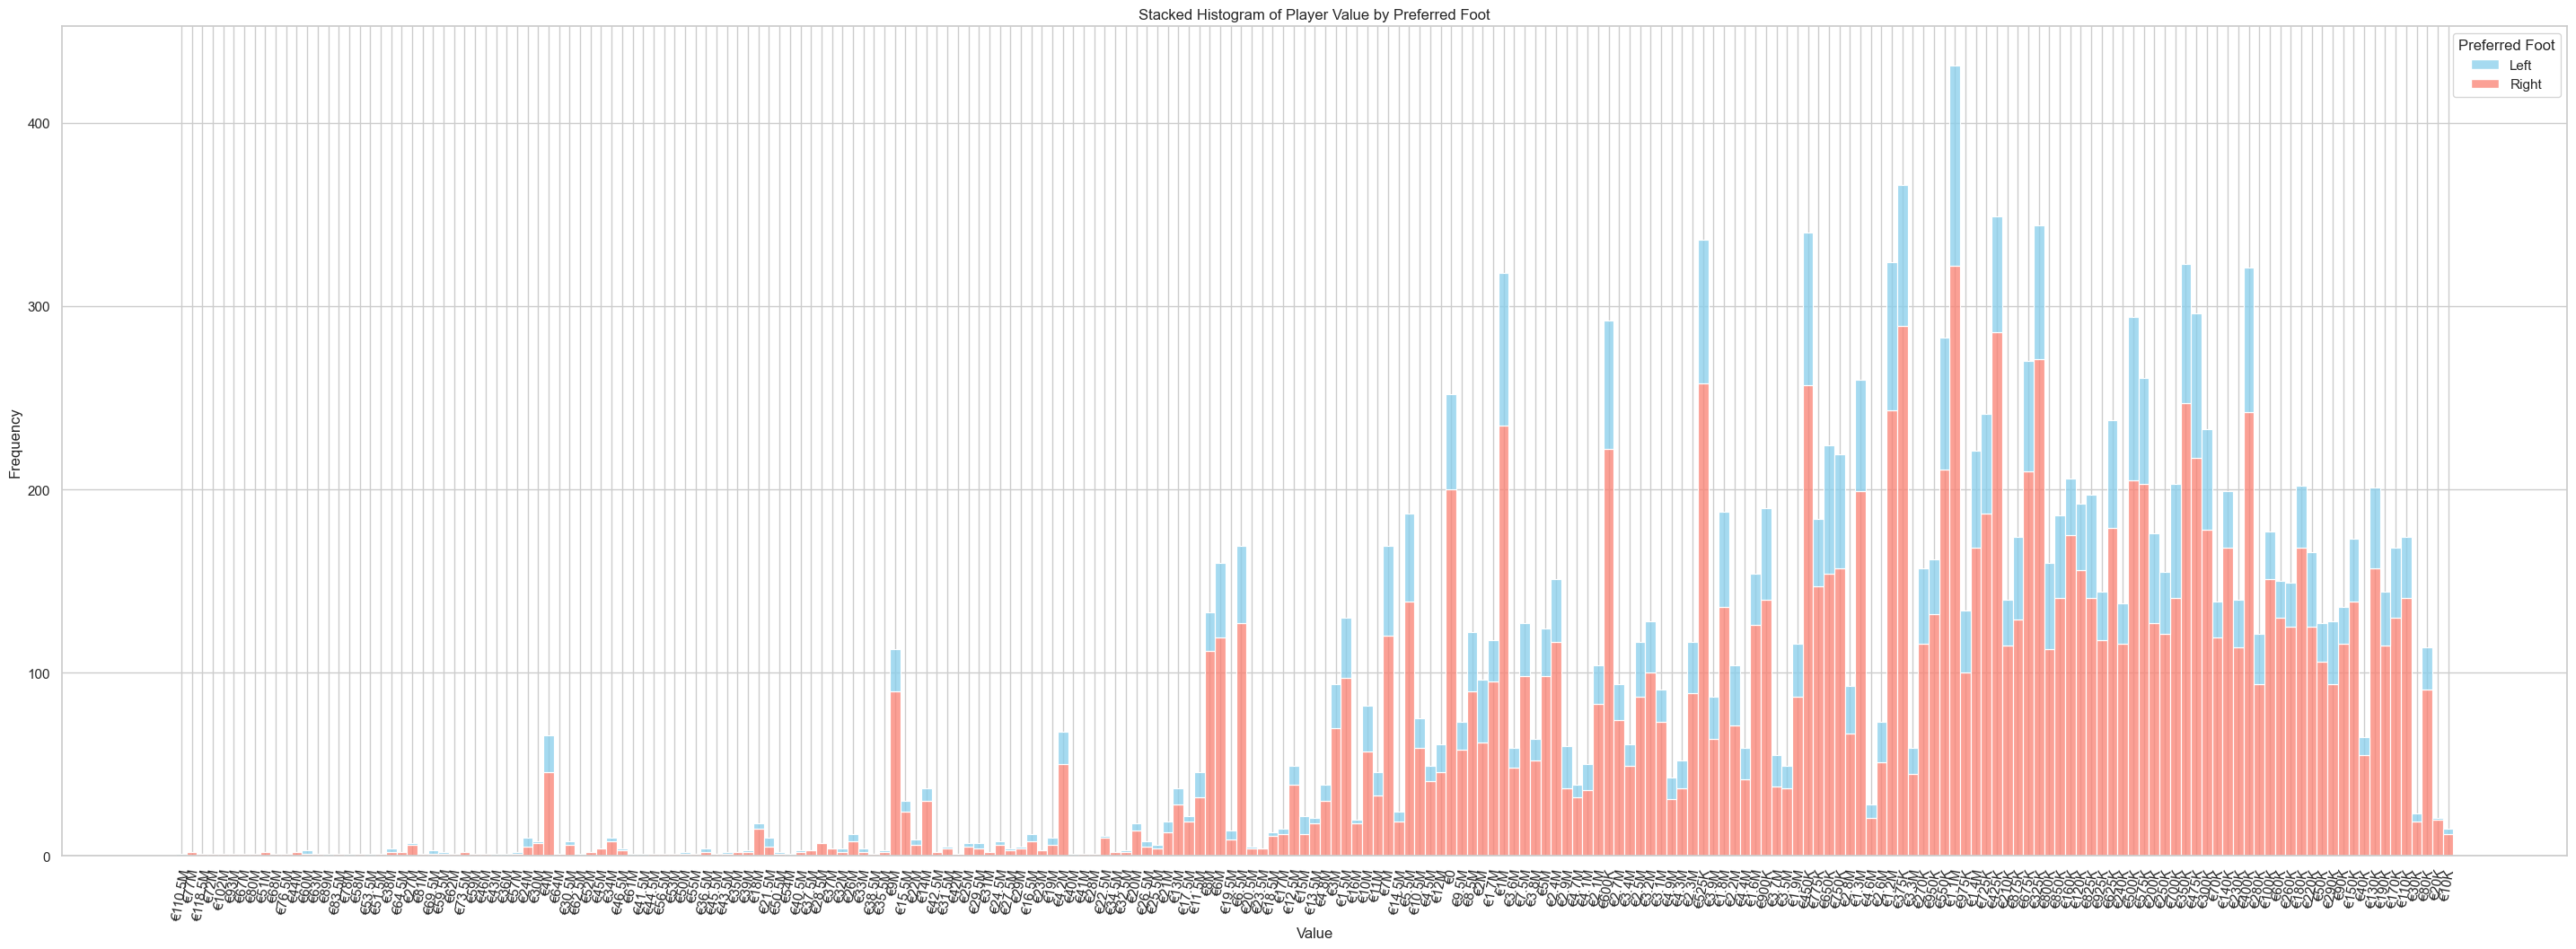

In [9]:
"""## Question-3"""

sns.set(style="whitegrid")

plt.figure(figsize=(36, 12))
sns.histplot(data=df, x='Value', hue='Preferred Foot', multiple='stack', bins=20, palette={'Left': 'skyblue', 'Right': 'salmon'})

plt.title('Stacked Histogram of Player Value by Preferred Foot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=80)

plt.show()


posx and posy should be finite values
posx and posy should be finite values


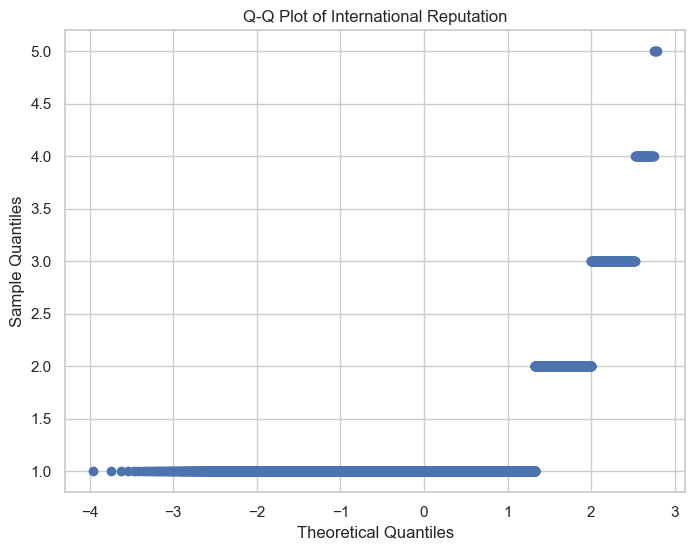

In [10]:
"""## Question-4"""

from scipy.stats import probplot

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
probplot(df['International Reputation'], plot=plt, dist='norm', fit=True, rvalue=True)

plt.title('Q-Q Plot of International Reputation')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()
